In [1]:
import datetime
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [2]:
import keras
# Load and preprocess data
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
#Define Alexnet Model
def AlexnetModel(input_shape,num_classes):
  model = Sequential()
  model.add(Conv2D(filters=96,kernel_size=(3,3),strides=(4,4),input_shape=input_shape, activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(256,(5,5),padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(384,(3,3),padding='same',activation='relu'))
  model.add(Conv2D(384,(3,3),padding='same',activation='relu'))
  model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  model.add(Flatten())
  model.add(Dense(4096, activation='relu'))
  #model.add(Dropout(0.4))
  model.add(Dense(4096, activation='relu'))
  #model.add(Dropout(0.4))
  model.add(Dense(num_classes,activation='softmax'))

  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

  return model

In [4]:
num_classes = 10
model = AlexnetModel((32, 32, 3), num_classes)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 8, 96)          2688      
                                                                 
 max_pooling2d (MaxPooling2  (None, 4, 4, 96)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 2, 2, 256)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 384)         885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 384)         1

In [5]:
# Train model
checkpoint = keras.callbacks.ModelCheckpoint('best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True)

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=20,
                    validation_split=0.2)    #callbacks=[checkpoint]

Epoch 1/20
313/313 [==============================] - 14s 24ms/step - loss: 2.0592 - accuracy: 0.1751 - val_loss: 1.9112 - val_accuracy: 0.2207
Epoch 2/20
313/313 [==============================] - 6s 19ms/step - loss: 1.7146 - accuracy: 0.3219 - val_loss: 1.5789 - val_accuracy: 0.3957
Epoch 3/20
313/313 [==============================] - 6s 19ms/step - loss: 1.4629 - accuracy: 0.4539 - val_loss: 1.4645 - val_accuracy: 0.4573
Epoch 4/20
313/313 [==============================] - 6s 19ms/step - loss: 1.3151 - accuracy: 0.5194 - val_loss: 1.3480 - val_accuracy: 0.5242
Epoch 5/20
313/313 [==============================] - 6s 20ms/step - loss: 1.2099 - accuracy: 0.5646 - val_loss: 1.2617 - val_accuracy: 0.5436
Epoch 6/20
313/313 [==============================] - 6s 19ms/step - loss: 1.1343 - accuracy: 0.5904 - val_loss: 1.2986 - val_accuracy: 0.5387
Epoch 7/20
313/313 [==============================] - 6s 20ms/step - loss: 1.0627 - accuracy: 0.6159 - val_loss: 1.2643 - val_accuracy: 0.562

In [ ]:
print(history.params)

{'verbose': 1, 'epochs': 20, 'steps': 313}


In [6]:
# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')

313/313 [==============================] - 2s 4ms/step - loss: 1.9577 - accuracy: 0.5671
Test loss: 1.9577
Test accuracy: 0.5671


In [13]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

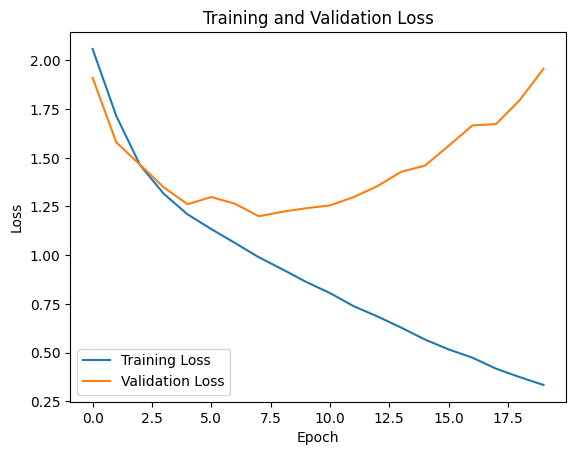

In [14]:
history.history.values
# Print final validation accuracy
#print(f'Final Validation Accuracy: {val_accuracy_list[-1]}%')
# Calculate total number of parameters
#total_params = sum(p.numel() for p in net.parameters())
#print(f'Total number of parameters in the model: {total_params}')

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
#plt.savefig('temp/ResNet_training_validation_loss.png')
plt.show()